<a href="https://colab.research.google.com/github/uddeshya-23/Concrete-case-study/blob/main/concrete_stregth_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [5]:
concrete=pd.read_csv('/content/drive/MyDrive/Upgrad Data/Concrete_Data_Yeh.csv')
concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
concrete.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
concrete.shape

(1030, 9)

In [8]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
concrete.isnull().values.any()

False

In [10]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 72.1 MB/s eta 0:00:00


In [12]:
import sweetviz as sv
sweet_report=sv.analyze(concrete)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


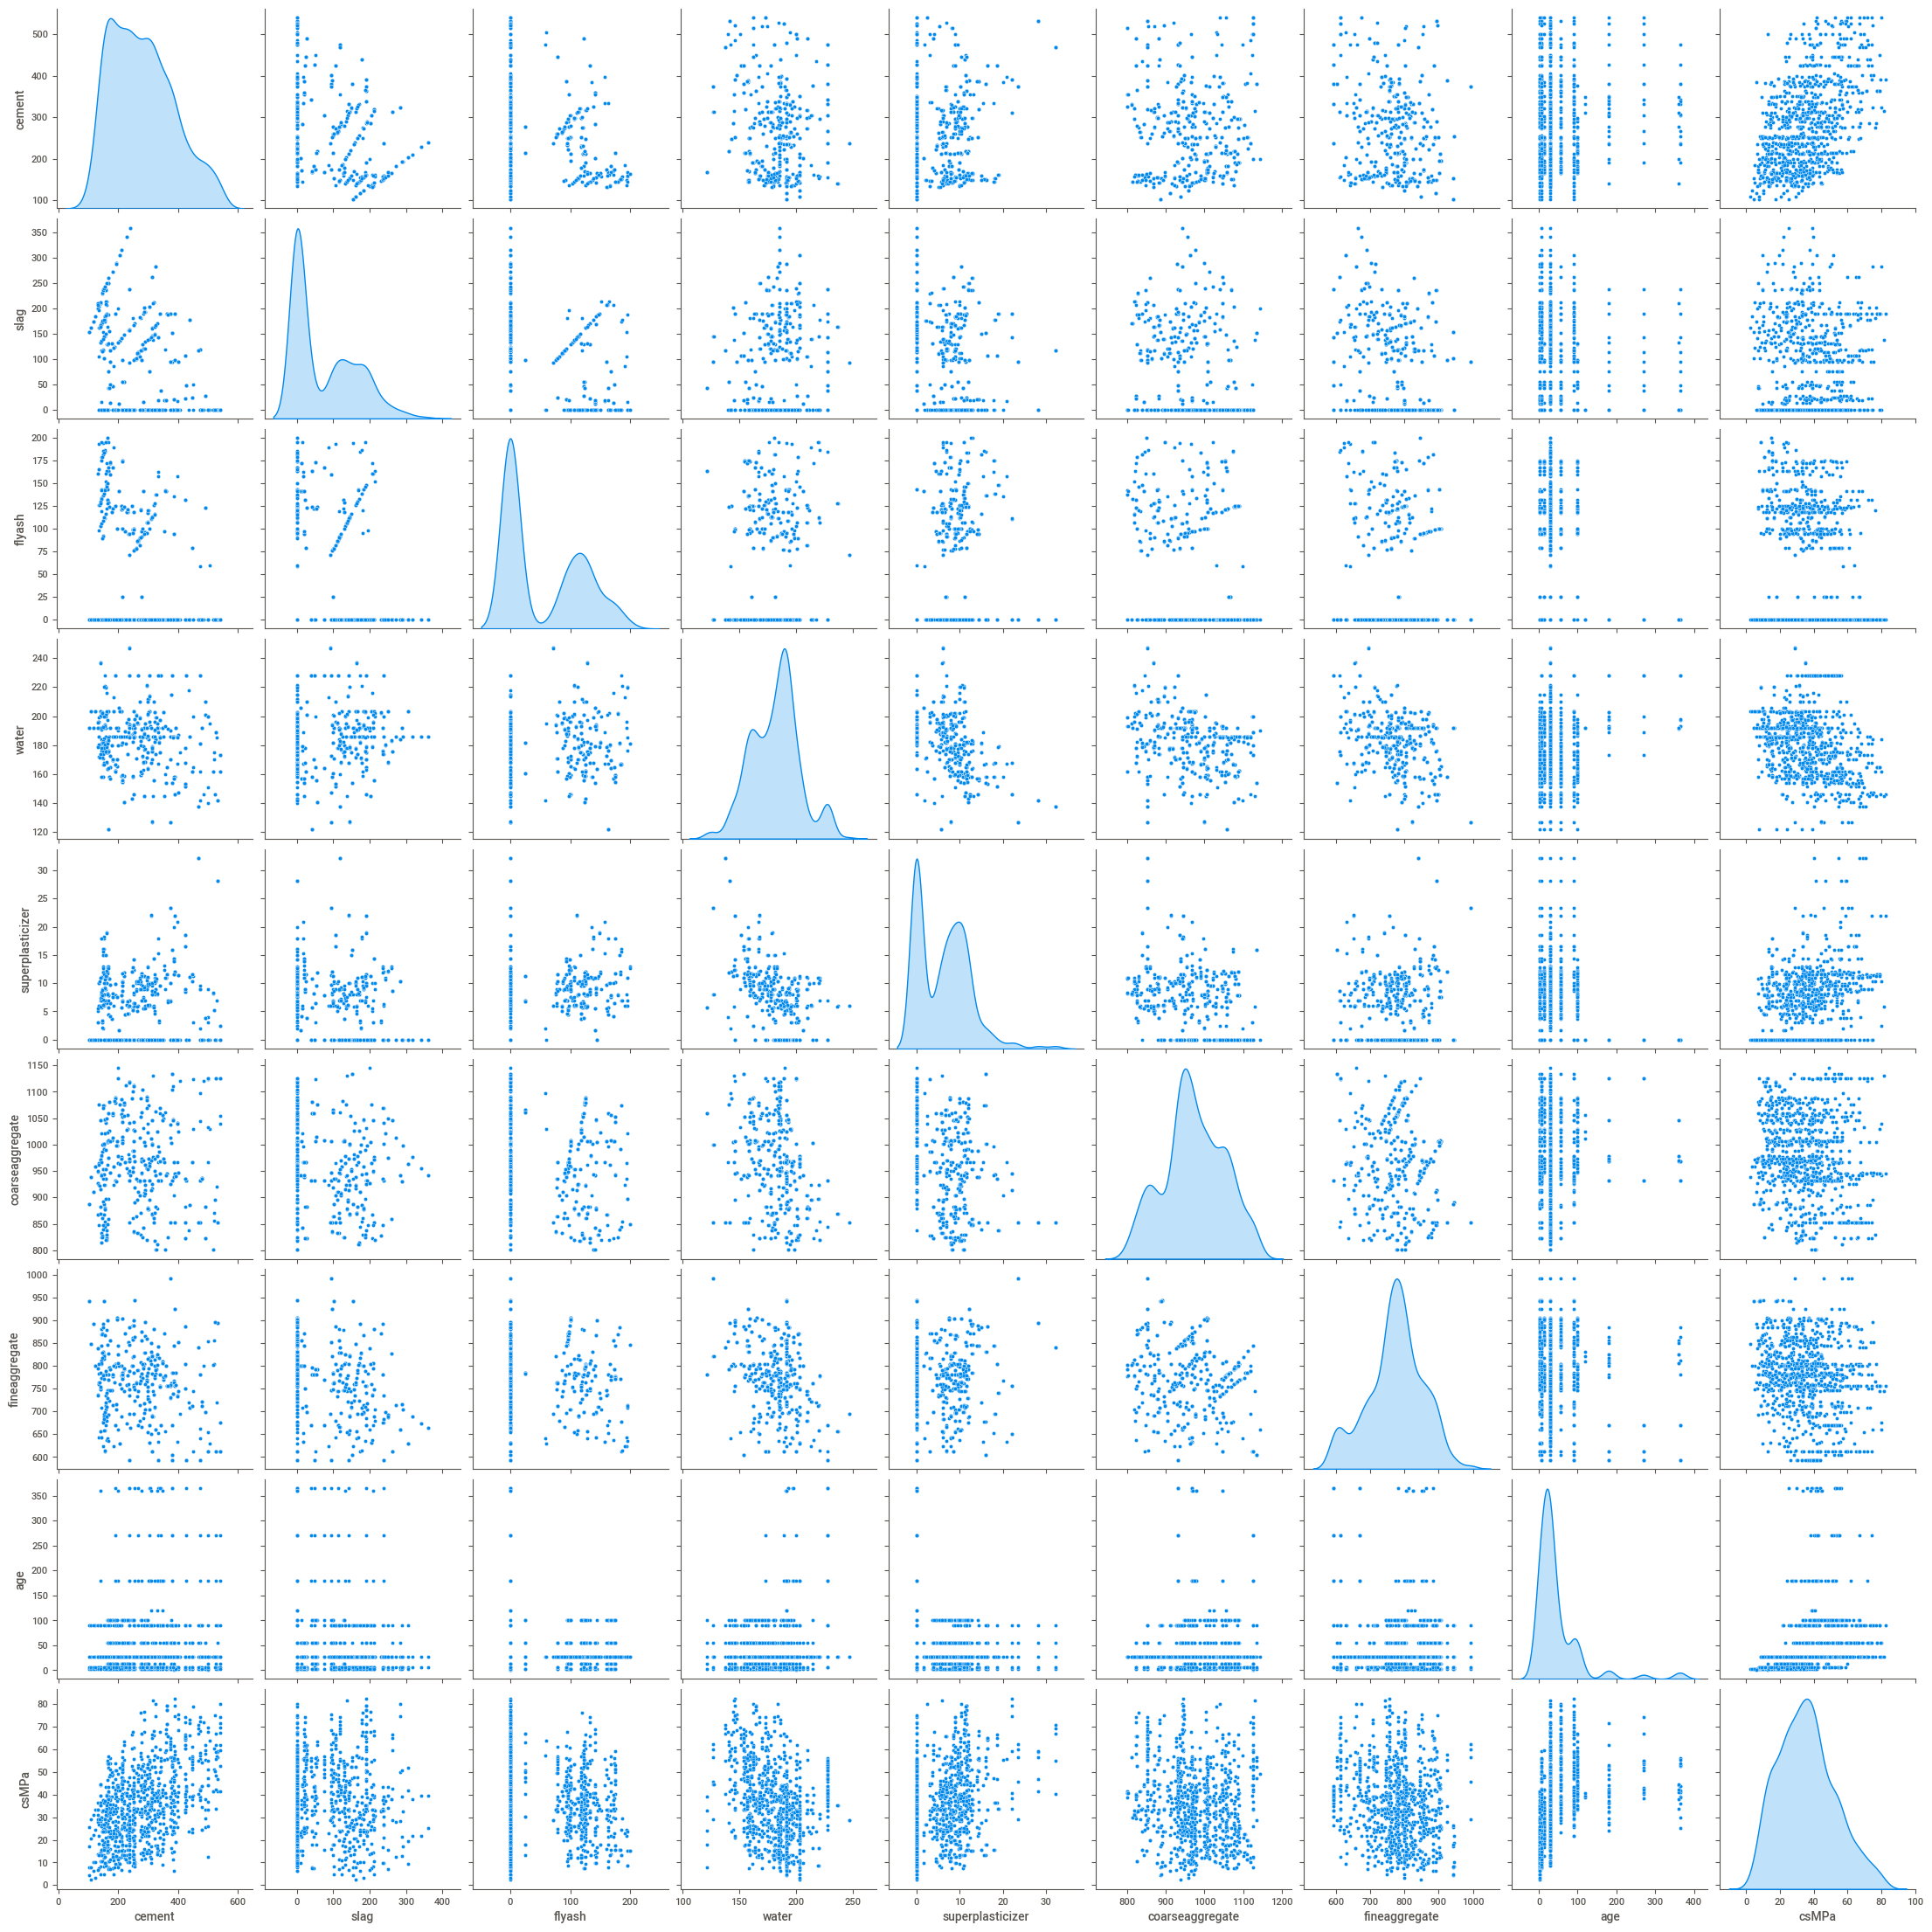

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(concrete,diag_kind='kde')

<Axes: >

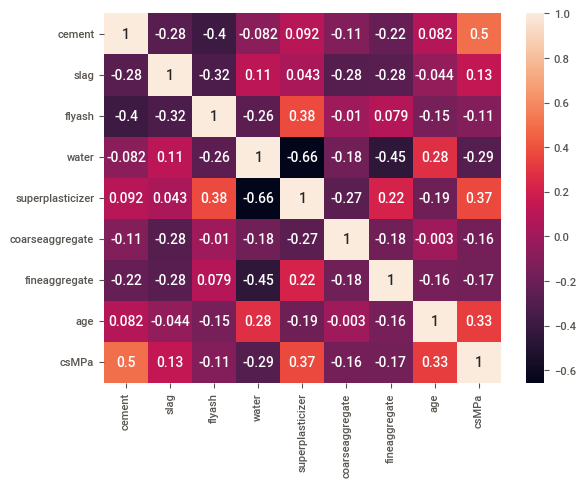

In [20]:
sns.heatmap(concrete.corr(), annot=True)

**BUILD A BASELINE LINEAR/REGRESSION MODEL**

In [27]:
# basic linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import PolynomialFeatures, StandardScaler


In [22]:
X=concrete.drop('csMPa', axis=1)
y=concrete[['csMPa']]

Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size=.20, random_state=10)

lr = LinearRegression()
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))


Training R2
0.6210697467843866
Testing R2
0.5911879648718986


In [31]:

X=concrete.drop('csMPa', axis=1)
y=concrete[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
s=StandardScaler()
scaledtrain=s.fit_transform(Xtrain)
scaledtest=s.transform(Xtest)
lr = LinearRegression()
lr.fit(scaledtrain,ytrain)
print("Training R2")
print(lr.score(scaledtrain,ytrain))

print("Testing R2")
print(lr.score(scaledtest,ytest))

Training R2
0.6210697467843866
Testing R2
0.5911879648718986


**WITH-PIPELINE**

In [33]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
X=concrete.drop('csMPa',axis=1)
y=concrete[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
     ("sc",StandardScaler()),
     ("pt",PowerTransformer()),
     ("lr", LinearRegression()),
     ))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.8159888339272847
Testing R2
0.8143003718403873


Ridge and lasso work only for underfit/overfit == Regularization





In [46]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso,Ridge
X=concrete.drop('csMPa',axis=1)
y=concrete[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline(( ("poly",PolynomialFeatures(degree=3)), ("lr", LinearRegression()) ))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.9299073744874055
Testing R2
0.8718147127105154


In [48]:
##RFE
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso,Ridge
from sklearn.feature_selection import RFE
X=concrete.drop('csMPa',axis=1)
y=concrete[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline(( ("poly",PolynomialFeatures(degree=3)),
                 ("rfe",RFE(estimator=LinearRegression(),n_features_to_select=100)),
                 ("lr", LinearRegression()) ))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.8585402386412412
Testing R2
0.7859858140478067


In [57]:
##INCORPORATE GRADIENT BOOSTING MODEL

from sklearn.ensemble import GradientBoostingRegressor
# gbr=GradientBoostingRegressor(max_depth=10,random_state=10)
gbr=GradientBoostingRegressor(n_estimators=1500,random_state=10)
gbr.fit(Xtrain,ytrain)
print("Training R2")
print(gbr.score(Xtrain,ytrain))
print("Testing R2")
print(gbr.score(Xtest,ytest))

Training R2
0.9927791355401739
Testing R2
0.9429121083307876


**VALIDATION CURVE**

Automatically created module for IPython interactive environment


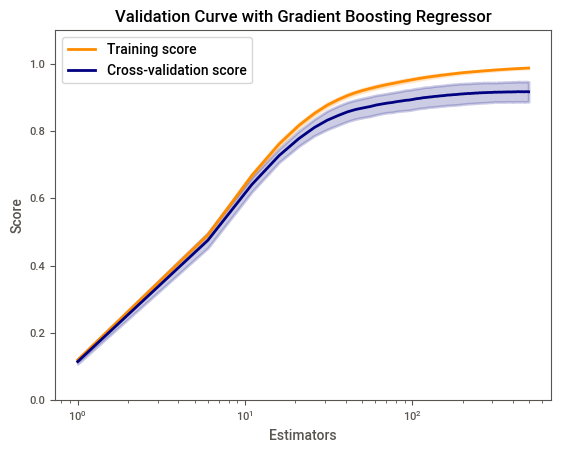

In [58]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,500,5)
train_scores, test_scores = validation_curve(
    GradientBoostingRegressor(), Xtrain, ytrain, param_name="n_estimators", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting Regressor")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [37]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
#Ridge Regression Model
ridgeReg = Ridge(alpha=20)

ridgeReg.fit(Xtrain,ytrain)

#train and test scorefor ridge regression
trainscoreridge = ridgeReg.score(Xtrain, ytrain)
testscoreridge = ridgeReg.score(Xtest, ytest)
print("trainscoreridge",trainscoreridge)
print("testscoreridge",testscoreridge)

trainscoreridge 0.6210697382820891
testscoreridge 0.5911811371282143


In [40]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(scaledtrain,ytrain)
trainscorels =lasso.score(scaledtrain,ytrain)
testscorels =lasso.score(scaledtest,ytest)

print("The train score for ls model is {}".format(trainscorels))
print("The test score for ls model is {}".format(testscorels))




Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.0006262230843006034


Only

1. DATA HAS To be syymetric / NORMAL

2. Make transfomation on input feature never output feature based on that diff. type of prediction-- Feature engineering

3.


In [ ]:
from sklearn.preprocessing  import PowerTransformer
pt=PowerTransformer()
transformedage=pt.fit_transform(concrete[['age']])